# Loan application Prediction


## C Soma sekhar goud
## Batch.No: DS2307

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("loan_prediction.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.shape

(614, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# categorical columns
print("Categorical Columns:")
print(categorical_columns)

# numerical columns
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Numerical Columns:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


There are null values in numerical columns and mostly in Categorical columns

In [11]:
# Dropping the null/missing values
df=df.dropna()

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# dropping Loan_ID column
df= df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [14]:
# Replacing Y: 1 & N :0 in Loan_status column
df.replace({"Loan_Status":{'N':0,'Y':1}}, inplace = True)

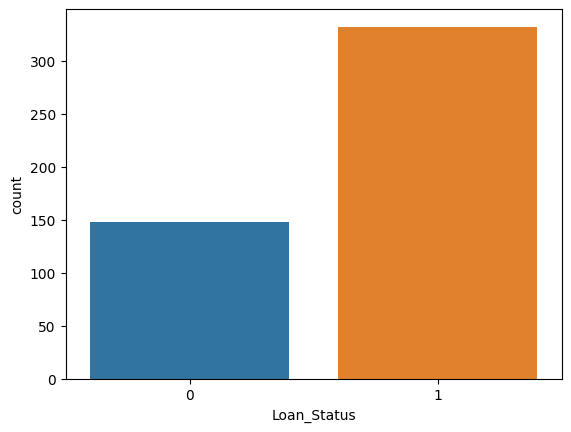

In [15]:
# Visualize Loan_status the target variable distribution
sns.countplot(x='Loan_Status', data=df)
plt.show()

In [16]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [17]:
# Replacing 3+ with next close number 4
df=df.replace(to_replace='3+', value =4)

In [18]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

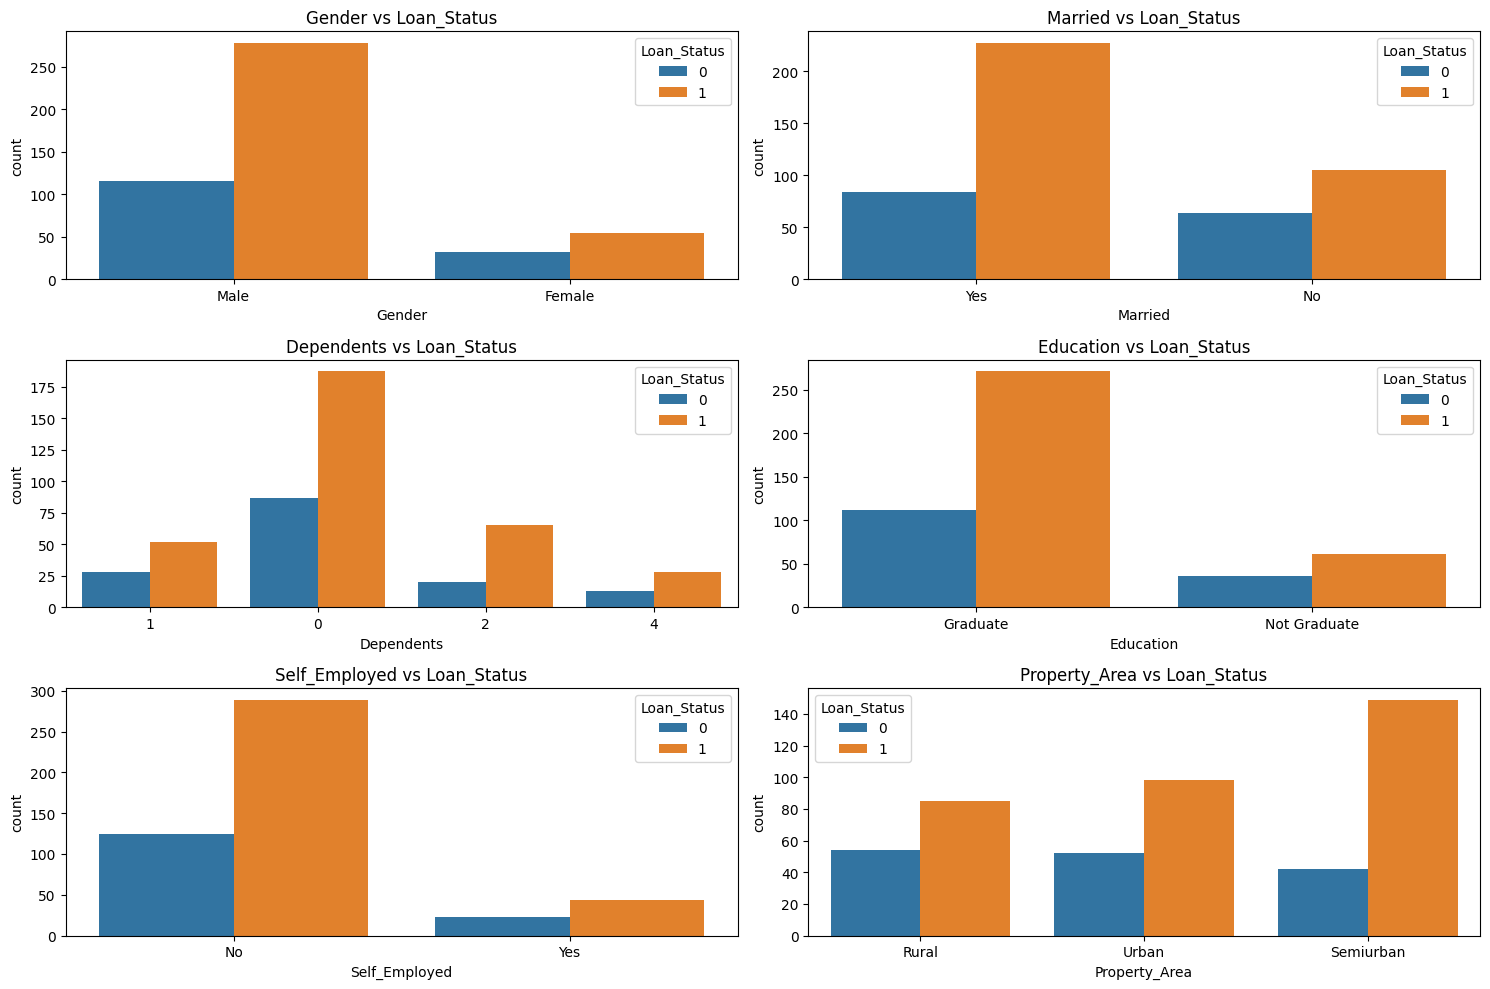

In [19]:
# Visualizing categorical columns against loan status

categorical_columns = df.select_dtypes(include=['object'])

# A grid for count plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, hue='Loan_Status', data=df)
    plt.title(f'{column} vs Loan_Status')

plt.tight_layout()
plt.show()

* Gender vs. Loan_Status: Even though both genders got loan approval ,seems like Male are geeting more loans

    
* Marital Status (Married) vs. Loan_Status:There is a high chance of loan approval for married.

* Dependents vs. Loan_Status: Having 0 Dependents are getting loan approval when comapred to rest. The lower the Dependents the lesser the chance of getting loan.

* Education vs. Loan_Status: Being a graduate is highly favorable to get loan.

* Self-Employment vs. Loan_Status: The difference of loan approval for self-employed vs Non self-employed is huge. Self_employed are having high loan approvals.
    

* Property Area vs. Loan_Status:
All most all areas are having same chances of geeting loan especially in SemiUrban.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 48.8+ KB


In [21]:
# Convert categorical columns to numerical values
df.replace({
    'Married': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 1, 'Female': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}

}, inplace=True)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [23]:
#
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']


In [24]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [25]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

## Splitting into Train-Test data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Model building

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [28]:
# Create instances of classifiers
classifiers = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    SVC(),  # Support Vector Classifier
    GradientBoostingClassifier()
]

In [29]:
# Finding the random state
def find_best_random_state(X, y, model, test_size=0.3, max_random_state=200):
    max_acc = 0
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        accuracy = accuracy_score(y_test, predictions)

        if accuracy > max_acc:
            max_acc = accuracy
            best_random_state = random_state

    return max_acc, best_random_state

In [ ]:
# Initialize variables to store random state values
rfc_rs = dtc_rs = lr_rs = svc_rs = gbc_rs = None

# Loop through each classifier
for classifier in classifiers:
    best_accuracy, best_random_state = find_best_random_state(X, y, classifier)
    print(f"Best accuracy for {classifier.__class__.__name__} is {best_accuracy} at random state {best_random_state}")

    # Assign the random state value to the respective variable
    if isinstance(classifier, RandomForestClassifier):
        rfc_rs = best_random_state
    elif isinstance(classifier, DecisionTreeClassifier):
        dtc_rs = best_random_state
    elif isinstance(classifier, LogisticRegression):
        lr_rs = best_random_state
    elif isinstance(classifier, SVC):
        svc_rs = best_random_state
    elif isinstance(classifier, GradientBoostingClassifier):
        gbc_rs = best_random_state


Best accuracy for RandomForestClassifier is 0.8611111111111112 at random state 124

Best accuracy for DecisionTreeClassifier is 0.8125 at random state 145

Best accuracy for LogisticRegression is 0.8611111111111112 at random state 82

Best accuracy for SVC is 0.7569444444444444 at random state 195

Best accuracy for GradientBoostingClassifier is 0.8402777777777778 at random state 44

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def classify(model, X, y, best_random_state=None):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=best_random_state)

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions for the test set
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy * 100)

      # Cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score) * 100)

    print('Difference b/w Accuracy & Cross Validation score is:', accuracy-np.mean(score))


    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

In [32]:
# List of trained models
models = [RandomForestClassifier(random_state=rfc_rs),
          DecisionTreeClassifier(random_state=dtc_rs),
          LogisticRegression(max_iter=500, random_state=lr_rs),
          SVC(random_state=svc_rs),
          GradientBoostingClassifier(random_state=gbc_rs)]

# Loop through each model and print evaluation metrics
for model in models:
    print(f"\nEvaluation metrics for {model.__class__.__name__}:\n")
    classify(model, X, y, best_random_state=None)


Evaluation metrics for RandomForestClassifier:

Accuracy: 76.38888888888889
CV Score: 79.375
Difference b/w Accuracy & Cross Validation score is: -0.029861111111111116
Confusion Matrix:
[[16 24]
 [10 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.40      0.48        40
           1       0.80      0.90      0.85       104

    accuracy                           0.76       144
   macro avg       0.71      0.65      0.67       144
weighted avg       0.75      0.76      0.75       144


Evaluation metrics for DecisionTreeClassifier:

Accuracy: 77.77777777777779
CV Score: 71.24999999999999
Difference b/w Accuracy & Cross Validation score is: 0.06527777777777788
Confusion Matrix:
[[28 15]
 [17 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        43
           1       0.85      0.83      0.84       101

    accuracy                           0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 76.38888888888889
CV Score: 77.29166666666666
Difference b/w Accuracy & Cross Validation score is: -0.009027777777777746
Confusion Matrix:
[[27 20]
 [14 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61        47
           1       0.81      0.86      0.83        97

    accuracy                           0.76       144
   macro avg       0.73      0.72      0.72       144
weighted avg       0.76      0.76      0.76       144



## Based on the above results we choose "GradientBoostingClassifier" as best suitable model

In [37]:
from sklearn.model_selection import GridSearchCV

# GradientBoostingClassifier
gbc_classifier = GradientBoostingClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_leaf': [1, 2, 4, 8],
    'random_state': [10, 50, 1000]
}


In [38]:
# Create GridSearchCV instance
grid_search = GridSearchCV(gbc_classifier, param_grid, cv=5, scoring='accuracy')

In [39]:
# Fit the model to the data
grid_search.fit(X, y)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300, 'random_state': 1000}


In [40]:
# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
# Define a GradientBoostingClassifier with GridSearchCV hyperparameters
best_model = GradientBoostingClassifier(
    criterion='entropy',
    max_depth=,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=1000
)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
import pickle

# Specify the file path where you want to save the model
file_path = "loan_status_gbc_model.pkl"

model = GradientBoostingClassifier()

# Save the model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(best_estimator, file)